# Exploración y preprocesamiento de los datos

* Entender los datos con los que vamos a trabajar
* Obtener primeras conclusiones
* Valorar la calidad de los datos

Comprobaciones iniciales sobre los datos

Para cada atributo conocer qué tipo de dato es y su rango

Los datos están disponibles en:
https://www.kaggle.com/sudalairajkumar/novel-corona-virus-2019-dataset

In [172]:
# Cargamos los datos en un dataframe
import pandas as pd
import datetime
covid19 = pd.read_csv("./data/covid_19_data.csv")

Mostrar las columnas que forman el dataset

In [173]:
covid19.columns

Index(['SNo', 'ObservationDate', 'Province/State', 'Country/Region',
       'Last Update', 'Confirmed', 'Deaths', 'Recovered'],
      dtype='object')

Examinamos el tipo de datos de cada columna

In [174]:
covid19.dtypes

SNo                  int64
ObservationDate     object
Province/State      object
Country/Region      object
Last Update         object
Confirmed          float64
Deaths             float64
Recovered          float64
dtype: object

Mostramos las primeras 5 filas 

In [175]:
covid19.head()

,SNo,ObservationDate,Province/State,Country/Region,Last Update,Confirmed,Deaths,Recovered
0,1,01/22/2020,Anhui,Mainland China,1/22/2020 17:00,1.0,0.0,0.0
1,2,01/22/2020,Beijing,Mainland China,1/22/2020 17:00,14.0,0.0,0.0
2,3,01/22/2020,Chongqing,Mainland China,1/22/2020 17:00,6.0,0.0,0.0
3,4,01/22/2020,Fujian,Mainland China,1/22/2020 17:00,1.0,0.0,0.0
4,5,01/22/2020,Gansu,Mainland China,1/22/2020 17:00,0.0,0.0,0.0


Obtenemos la información y tipo de los datos

In [176]:
covid19.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 236017 entries, 0 to 236016
Data columns (total 8 columns):
 #   Column           Non-Null Count   Dtype  
---  ------           --------------   -----  
 0   SNo              236017 non-null  int64  
 1   ObservationDate  236017 non-null  object 
 2   Province/State   173972 non-null  object 
 3   Country/Region   236017 non-null  object 
 4   Last Update      236017 non-null  object 
 5   Confirmed        236017 non-null  float64
 6   Deaths           236017 non-null  float64
 7   Recovered        236017 non-null  float64
dtypes: float64(3), int64(1), object(4)
memory usage: 14.4+ MB


Observamos que la columna Province/State tiene valores nulos

## Visualización y exploración de variables continuas

In [177]:
covid19['Confirmed']

0              1.0
1             14.0
2              6.0
3              1.0
4              0.0
            ...   
236012     69504.0
236013     16480.0
236014      1321.0
236015     50582.0
236016    255335.0
Name: Confirmed, Length: 236017, dtype: float64

In [178]:
covid19['Confirmed'].describe()

count    2.360170e+05
mean     5.715800e+04
std      1.834751e+05
min     -3.028440e+05
25%      7.270000e+02
50%      6.695000e+03
75%      3.349900e+04
max      3.664050e+06
Name: Confirmed, dtype: float64

Rango intercuartil: Contiene a la mitad de las instancias situadas en el centro de la distribución y da una medida del rango correspondiente a estas instancias

In [179]:
rango = covid19["Confirmed"].max() - covid19["Confirmed"].min()
iqr = covid19["Confirmed"].quantile(0.75) - covid19["Confirmed"].quantile(0.25)
print(rango)
print(iqr)

3966894.0
32772.0


Calculamos la mediana.

Cuando la distribución de los datos es simétrica tal que la media y la mediana coinciden, como en las distribuciones normales, tenemos los datos repartidos por igual por encima y por debajo de la media. 

En este caso la desviación estándar es buen indicador de la dispersión de los datos.

In [180]:
print(covid19['Confirmed'].median())


6695.0


¿Existe correlación?

In [181]:
deathConfirmed = covid19.corr(method='pearson')
print(deathConfirmed)

                SNo  Confirmed    Deaths  Recovered
SNo        1.000000   0.240490  0.176389   0.174289
Confirmed  0.240490   1.000000  0.858997   0.536756
Deaths     0.176389   0.858997  1.000000   0.452438
Recovered  0.174289   0.536756  0.452438   1.000000


## Limpieza de datos: corregir, completar, crear y convertir


¿Cuántas entradas de datos hay?

In [182]:
covid19.shape

(236017, 8)

¿Hay columnas con datos vacíos?

In [183]:
covid19.isnull().sum()

SNo                    0
ObservationDate        0
Province/State     62045
Country/Region         0
Last Update            0
Confirmed              0
Deaths                 0
Recovered              0
dtype: int64

Eliminados el SN del df ya que para nuestro análisis no es un atributo relevante

In [184]:
covid19.drop(['SNo'], axis=1, inplace=True)

Eliminamos la columna fecha porquees redundante con última actualización

In [185]:
covid19.drop('Last Update', axis=1, inplace=True)

In [186]:
covid19.tail()

,ObservationDate,Province/State,Country/Region,Confirmed,Deaths,Recovered
236012,02/27/2021,Zaporizhia Oblast,Ukraine,69504.0,1132.0,65049.0
236013,02/27/2021,Zeeland,Netherlands,16480.0,178.0,0.0
236014,02/27/2021,Zhejiang,Mainland China,1321.0,1.0,1314.0
236015,02/27/2021,Zhytomyr Oblast,Ukraine,50582.0,834.0,44309.0
236016,02/27/2021,Zuid-Holland,Netherlands,255335.0,3732.0,0.0


Reemplazamos los valores vacíos de State con los valores mayoritarios

In [187]:
covid19['Province/State'].value_counts()
tempState = covid19['Province/State'].mode()
print(tempState)
covid19['Province/State'].fillna(tempState[0], inplace=True)

0    Unknown
dtype: object


In [188]:
covid19.tail()

,ObservationDate,Province/State,Country/Region,Confirmed,Deaths,Recovered
236012,02/27/2021,Zaporizhia Oblast,Ukraine,69504.0,1132.0,65049.0
236013,02/27/2021,Zeeland,Netherlands,16480.0,178.0,0.0
236014,02/27/2021,Zhejiang,Mainland China,1321.0,1.0,1314.0
236015,02/27/2021,Zhytomyr Oblast,Ukraine,50582.0,834.0,44309.0
236016,02/27/2021,Zuid-Holland,Netherlands,255335.0,3732.0,0.0


Renombramos columnas para mayor claridad

In [189]:
covid19.rename(columns={'ObservationDate':'Date', 'Country/Region':'Country'}, inplace=True)

In [190]:
covid19.head()

,Date,Province/State,Country,Confirmed,Deaths,Recovered
0,01/22/2020,Anhui,Mainland China,1.0,0.0,0.0
1,01/22/2020,Beijing,Mainland China,14.0,0.0,0.0
2,01/22/2020,Chongqing,Mainland China,6.0,0.0,0.0
3,01/22/2020,Fujian,Mainland China,1.0,0.0,0.0
4,01/22/2020,Gansu,Mainland China,0.0,0.0,0.0


Listamos los países afectados por el virus para verificar los valores

In [191]:
covid19['Country'].unique()

array(['Mainland China', 'Hong Kong', 'Macau', 'Taiwan', 'US', 'Japan',
       'Thailand', 'South Korea', 'Singapore', 'Philippines', 'Malaysia',
       'Vietnam', 'Australia', 'Mexico', 'Brazil', 'Colombia', 'France',
       'Nepal', 'Canada', 'Cambodia', 'Sri Lanka', 'Ivory Coast',
       'Germany', 'Finland', 'United Arab Emirates', 'India', 'Italy',
       'UK', 'Russia', 'Sweden', 'Spain', 'Belgium', 'Others', 'Egypt',
       'Iran', 'Israel', 'Lebanon', 'Iraq', 'Oman', 'Afghanistan',
       'Bahrain', 'Kuwait', 'Austria', 'Algeria', 'Croatia',
       'Switzerland', 'Pakistan', 'Georgia', 'Greece', 'North Macedonia',
       'Norway', 'Romania', 'Denmark', 'Estonia', 'Netherlands',
       'San Marino', ' Azerbaijan', 'Belarus', 'Iceland', 'Lithuania',
       'New Zealand', 'Nigeria', 'North Ireland', 'Ireland', 'Luxembourg',
       'Monaco', 'Qatar', 'Ecuador', 'Azerbaijan', 'Czech Republic',
       'Armenia', 'Dominican Republic', 'Indonesia', 'Portugal',
       'Andorra', 'Latvia

Encontramos que China está mal nombrado y cambiamos su nombre:

In [192]:
covid19.replace({'Country': 'Mainland China'}, 'China', inplace=True)

In [193]:
country_sorted = list(covid19['Country'].unique())
country_sorted.sort()
print(country_sorted)

[' Azerbaijan', "('St. Martin',)", 'Afghanistan', 'Albania', 'Algeria', 'Andorra', 'Angola', 'Antigua and Barbuda', 'Argentina', 'Armenia', 'Aruba', 'Australia', 'Austria', 'Azerbaijan', 'Bahamas', 'Bahamas, The', 'Bahrain', 'Bangladesh', 'Barbados', 'Belarus', 'Belgium', 'Belize', 'Benin', 'Bhutan', 'Bolivia', 'Bosnia and Herzegovina', 'Botswana', 'Brazil', 'Brunei', 'Bulgaria', 'Burkina Faso', 'Burma', 'Burundi', 'Cabo Verde', 'Cambodia', 'Cameroon', 'Canada', 'Cape Verde', 'Cayman Islands', 'Central African Republic', 'Chad', 'Channel Islands', 'Chile', 'China', 'Colombia', 'Comoros', 'Congo (Brazzaville)', 'Congo (Kinshasa)', 'Costa Rica', 'Croatia', 'Cuba', 'Curacao', 'Cyprus', 'Czech Republic', 'Denmark', 'Diamond Princess', 'Djibouti', 'Dominica', 'Dominican Republic', 'East Timor', 'Ecuador', 'Egypt', 'El Salvador', 'Equatorial Guinea', 'Eritrea', 'Estonia', 'Eswatini', 'Ethiopia', 'Faroe Islands', 'Fiji', 'Finland', 'France', 'French Guiana', 'Gabon', 'Gambia', 'Gambia, The', 

Podemos observar que tenemos países duplicados:
* Azerbaijan & Azerbaijan;
* Holly See & Vatican City;
* Ireland & Republic of Ireland;
* St. Martin & ('St. Martin',).

Y necesitaríamos información extra ya que teóricamente North Ireland es parte de UK.

Solucionamos problemas de nombres de países.

In [194]:
covid19.loc[covid19['Country']=='Holy See', 'Country'] = 'Vatican City'
covid19.loc[covid19['Country']==' Azerbaijan', 'Country'] = 'Azerbaijan'
covid19.loc[covid19['Country']=='Republic of Ireland', 'Country'] = 'Ireland'
covid19.loc[covid19['Country']=="('St. Martin',)", 'Country'] = 'St. Martin'

In [195]:
covid19[['Country', 'Confirmed']].groupby(['Country']).count()

,Confirmed
Country,
Afghanistan,370
Albania,356
Algeria,369
Andorra,363
Angola,345
...,...
West Bank and Gaza,339
Yemen,324
Zambia,347


Listamos todas las provincias:

In [196]:
covid19['Province/State'].unique()

array(['Anhui', 'Beijing', 'Chongqing', 'Fujian', 'Gansu', 'Guangdong',
       'Guangxi', 'Guizhou', 'Hainan', 'Hebei', 'Heilongjiang', 'Henan',
       'Hong Kong', 'Hubei', 'Hunan', 'Inner Mongolia', 'Jiangsu',
       'Jiangxi', 'Jilin', 'Liaoning', 'Macau', 'Ningxia', 'Qinghai',
       'Shaanxi', 'Shandong', 'Shanghai', 'Shanxi', 'Sichuan', 'Taiwan',
       'Tianjin', 'Tibet', 'Washington', 'Xinjiang', 'Yunnan', 'Zhejiang',
       'Unknown', 'Chicago', 'Illinois', 'California', 'Arizona',
       'Ontario', 'New South Wales', 'Victoria', 'British Columbia',
       'Bavaria', 'Queensland', 'Chicago, IL', 'South Australia',
       'Boston, MA', 'Los Angeles, CA', 'Orange, CA', 'Santa Clara, CA',
       'Seattle, WA', 'Tempe, AZ', 'San Benito, CA', 'Toronto, ON',
       'London, ON', 'Madison, WI', 'Cruise Ship',
       'Diamond Princess cruise ship', 'San Diego County, CA',
       'San Antonio, TX', 'Ashland, NE', 'Travis, CA',
       'From Diamond Princess', 'Lackland, TX', 'None',
   

In [197]:
covid19[covid19.Country == 'Spain']

,Date,Province/State,Country,Confirmed,Deaths,Recovered
551,02/01/2020,Unknown,Spain,1.0,0.0,0.0
618,02/02/2020,Unknown,Spain,1.0,0.0,0.0
687,02/03/2020,Unknown,Spain,1.0,0.0,0.0
757,02/04/2020,Unknown,Spain,1.0,0.0,0.0
827,02/05/2020,Unknown,Spain,1.0,0.0,0.0
...,...,...,...,...,...,...
235731,02/27/2021,Melilla,Spain,6938.0,70.0,125.0
235753,02/27/2021,Murcia,Spain,106200.0,1451.0,2180.0
235762,02/27/2021,Navarra,Spain,51244.0,1092.0,3905.0
235817,02/27/2021,Pais Vasco,Spain,150674.0,3726.0,16160.0


## Análisis exploratorio de los datos

¿Qué pais ha registrado el mayor número de contagios?

In [198]:
covid19['Country'].value_counts()

Russia             22698
US                 21462
Japan              13600
China              12500
India               9815
                   ...  
St. Martin             2
Channel Islands        1
North Ireland          1
East Timor             1
Cape Verde             1
Name: Country, Length: 223, dtype: int64

Número de países que han sido afectados por el virus

In [199]:
covid19['Country'].nunique()

223

Los diez países con mayor número de afectados:

In [200]:
covid19.groupby('Country')['Confirmed'].max().sort_values(ascending=False)[0:10]

Country
France          3664050.0
UK              3653272.0
US              3563578.0
Turkey          2693164.0
India           2146777.0
Argentina       2104197.0
Brazil          2037267.0
Poland          1696885.0
Iran            1623159.0
South Africa    1512225.0
Name: Confirmed, dtype: float64

 Los diez países con mayor número de muertes:

In [201]:
covid19.groupby('Country')['Deaths'].max().sort_values(ascending=False)[0:10]

Country
UK              108208.0
France           85141.0
Iran             59980.0
Brazil           59428.0
India            52092.0
US               51953.0
Argentina        51946.0
South Africa     49941.0
Poland           43656.0
Indonesia        35981.0
Name: Deaths, dtype: float64

País con mayor número de recuperados:

In [202]:
covid19.groupby('Country')['Recovered'].max().sort_values(ascending=False)[0:10]

Country
US              6399531.0
Turkey          2565723.0
India           2020951.0
Argentina       1899087.0
Brazil          1805549.0
Mexico          1630002.0
South Africa    1429047.0
Poland          1414461.0
Iran            1386534.0
Peru            1225995.0
Name: Recovered, dtype: float64

¿Cuántas personas fueron diagnosticadas por el virus cada día?

In [203]:
covid19.groupby('Date')[['Confirmed', 'Deaths', 'Recovered']].max().reset_index()

,Date,Confirmed,Deaths,Recovered
0,01/01/2021,2636045.0,64731.0,2114760.0
1,01/02/2021,2639404.0,65080.0,2126432.0
2,01/03/2021,2651893.0,65472.0,2136534.0
3,01/04/2021,2655915.0,65842.0,2146430.0
4,01/05/2021,2676195.0,66626.0,2155338.0
...,...,...,...,...
398,12/27/2020,2556621.0,62382.0,2015230.0
399,12/28/2020,2559575.0,62745.0,2037433.0
400,12/29/2020,2570767.0,63713.0,2058437.0
401,12/30/2020,2597124.0,64016.0,2078629.0


## Visualización de los datos


In [204]:
import matplotlib.pyplot as plt
import seaborn as sns

plt.rcParams["figure.figsize"] = (16,9)
plt.figure(figsize=(16,9));

<Figure size 1152x648 with 0 Axes>

Mostramos el número de personas:

<AxesSubplot:xlabel='Date'>

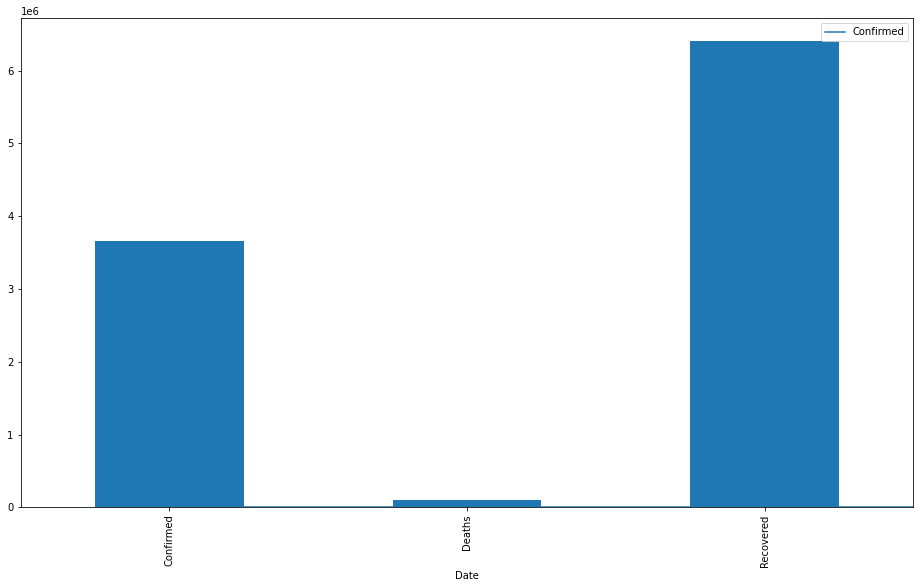

In [205]:
covid19[covid19.Country == 'Spain'][['Date', 'Confirmed']].plot(x='Date', y='Confirmed', kind='line', legend='Casos confirmados en Spain')


covid19[['Confirmed', 'Deaths', 'Recovered']].max().plot(kind='bar')


Listado de las provincias de China afectadas (histograma):

<AxesSubplot:xlabel='Province/State'>

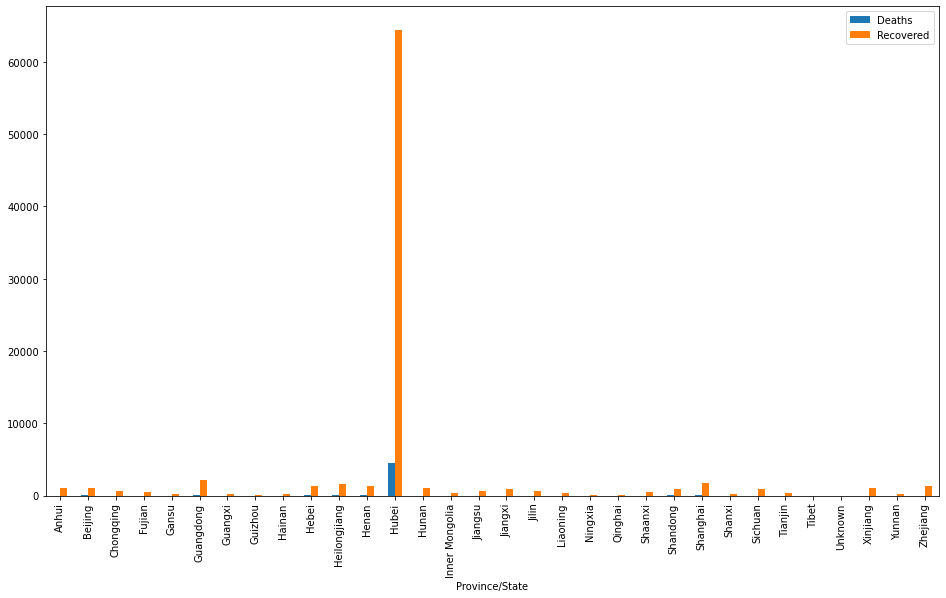

In [206]:
covid19[covid19.Country == 'China'][['Province/State', 'Deaths', 'Recovered']].groupby('Province/State').max().plot(kind='bar')

Número de confirmados vs muertes vs recuperados excepto China:

<AxesSubplot:xlabel='Date'>

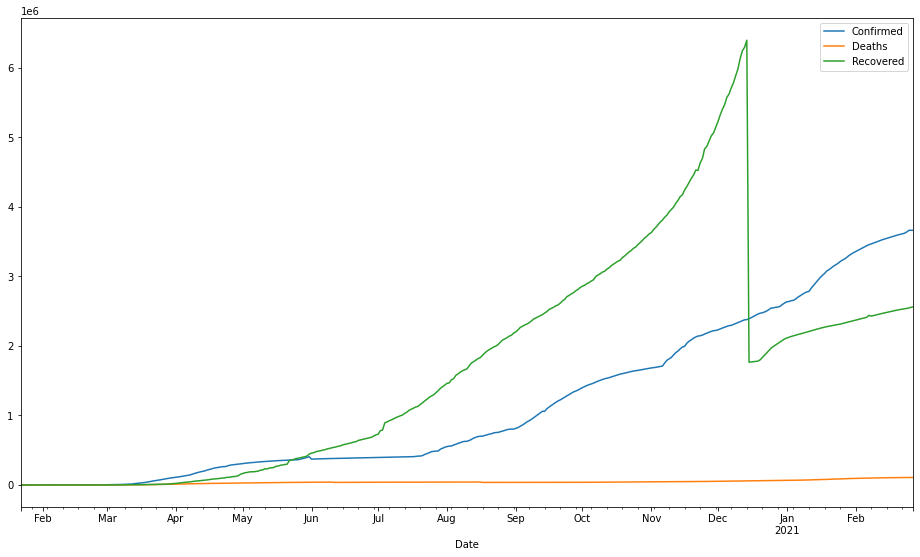

In [226]:
# Convertimos la fecha de formato string a fecha
covid19['Date'] = pd.to_datetime(covid19['Date'], errors = 'coerce')

covid19[covid19.Country != 'China'].groupby('Date').max().plot(kind='line')

<AxesSubplot:xlabel='Date'>

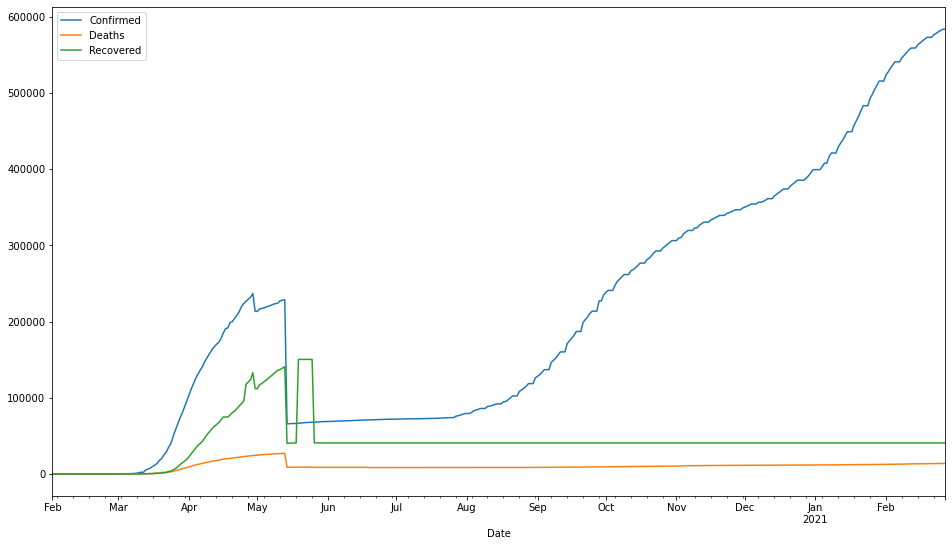

In [227]:
covid19[covid19.Country == 'Spain'].groupby('Date').max().plot(kind='line')


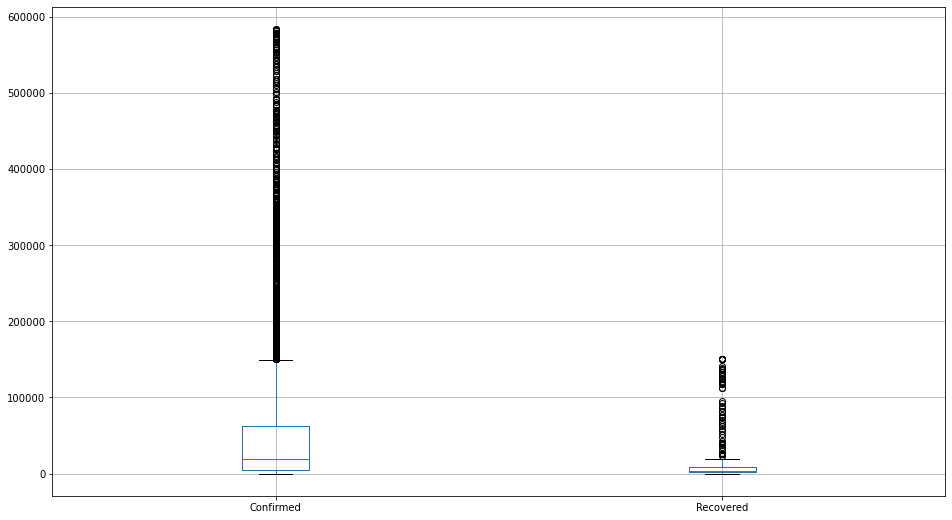

In [217]:
# Boxplot 
boxplot = covid19[covid19.Country == 'Spain'].boxplot(column=['Confirmed', 'Recovered'])

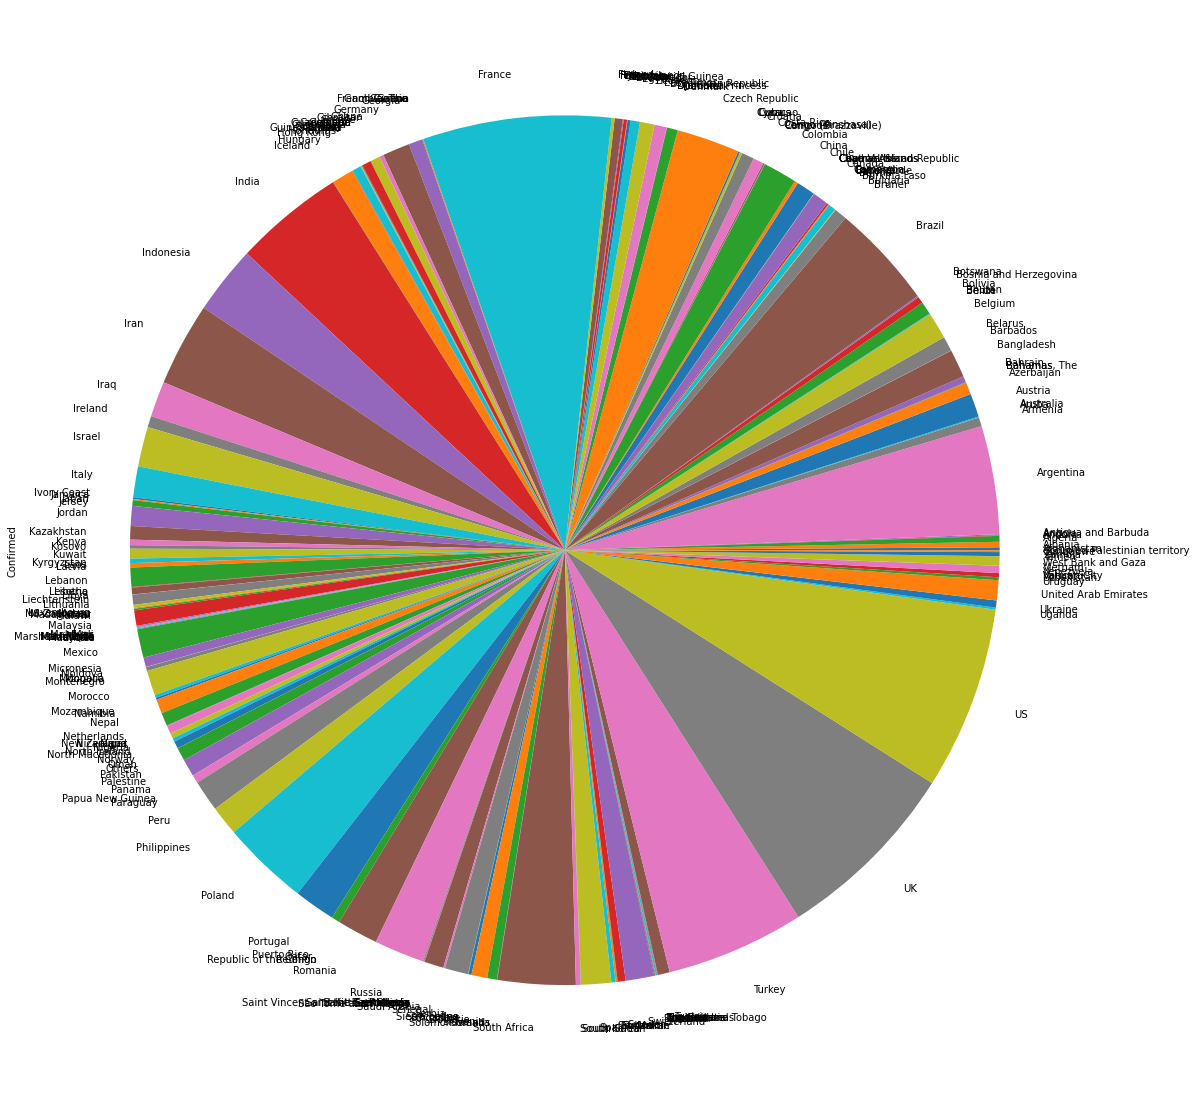

In [210]:
f, axes = plt.subplots(1,1, figsize=(30,20))
covid19.groupby('Country')['Confirmed'].max().plot(kind='pie', subplots=True, ax=axes, legend=None);